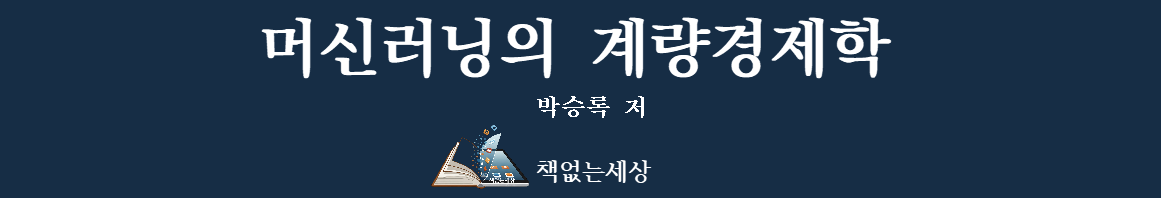

# Part 8: 머신러닝의 계량경제

## Chapter 3: 머신러닝의 자동화: Pycaret 활용 

### 4. PyCaret을 이용한 2진 분류(Binary Classification)

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:/JupyterWDirectory/MyStock")
os.getcwd()

'E:\\JupyterWDirectory\\MyStock'

In [2]:
# 라이브러리 불러오기
exec(open('Functions/Machine Learning_Econometrics_Lib.py').read())

In [3]:
"""
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

from joblib import dump
from joblib import load
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pickle import dump
from pickle import load
from scipy.stats import uniform
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

# Korean Fonts
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)
"""

In [3]:
# 데이터 불러오기
filename = "Data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

#### 1) 셋업(Setup)

In [5]:
# 모형의 셋업
from pycaret.classification import *
s = setup(data, target = 'class', session_id = 12345)

,Description,Value
0,Session id,12345
1,Target,class
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [6]:
# 파라미터, 변수 리스트
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [7]:
# X_train_transformed 출력
get_config('X_train_transformed')

,preg,plas,pres,skin,test,mass,pedi,age
351,4.0,137.0,84.0,0.0,0.0,31.200001,0.252,30.0
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
510,12.0,84.0,72.0,31.0,0.0,29.700001,0.297,46.0
254,12.0,92.0,62.0,7.0,258.0,27.600000,0.926,44.0
5,5.0,116.0,74.0,0.0,0.0,25.600000,0.201,30.0
...,...,...,...,...,...,...,...,...
366,6.0,124.0,72.0,0.0,0.0,27.600000,0.368,29.0
561,0.0,198.0,66.0,32.0,274.0,41.299999,0.502,28.0
465,0.0,124.0,56.0,13.0,105.0,21.799999,0.452,21.0
210,2.0,81.0,60.0,22.0,0.0,27.700001,0.290,25.0


In [8]:
# setup() 사용법
help(setup)

Help on function setup in module pycaret.classification.functional:

setup(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame]]] = None, target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, train_size: float = 0.7, test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, ordinal_features: Optional[Dict[str, list]] = None, numeric_features: Optional[List[str]] = None, categorical_features: Optional[List[str]] = None, date_features: Optional[List[str]] = None, text_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, keep_features: Optional[List[str]] = None, prepr

In [9]:
# setup()에서 변수의 정규화(minmax)
s = setup(data, target = 'class', session_id = 12345,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,12345
1,Target,class
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


<Axes: >

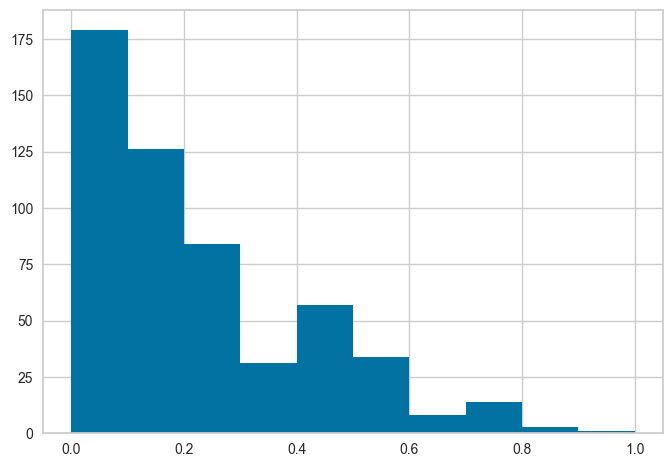

In [10]:
# X_train_transformed에서 특정변수 히스토그램
get_config('X_train_transformed')['preg'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

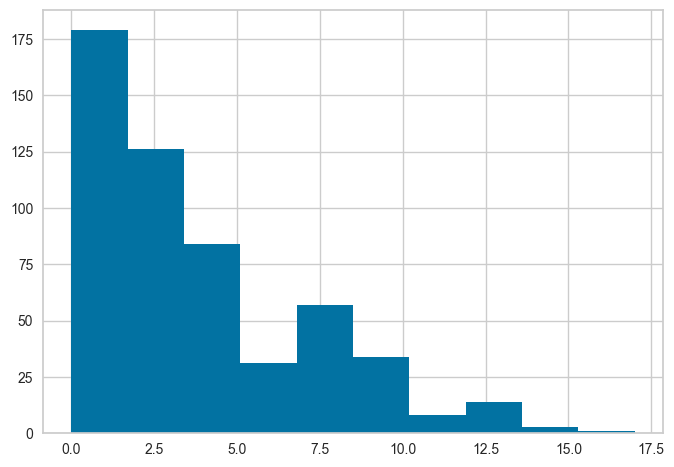

In [11]:
get_config('X_train')['preg'].hist()

___

#### 2) 모형비교(Compare Models)

In [12]:
# 2진분류 활용가능 모형
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
# 모형비교
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7654,0.8223,0.5453,0.7209,0.6165,0.4528,0.4647,0.0140
lr,Logistic Regression,0.7635,0.8206,0.5023,0.7441,0.5961,0.4376,0.4567,0.9330
lda,Linear Discriminant Analysis,0.7635,0.8223,0.5611,0.7097,0.6218,0.4536,0.4636,0.0120
et,Extra Trees Classifier,0.7541,0.8179,0.5503,0.6815,0.6046,0.4306,0.4380,0.0710
nb,Naive Bayes,0.7503,0.8006,0.5874,0.6629,0.6196,0.4354,0.4395,0.0140
rf,Random Forest Classifier,0.7503,0.8128,0.5547,0.6693,0.6021,0.4240,0.4305,0.0960
gbc,Gradient Boosting Classifier,0.7429,0.8029,0.5778,0.6497,0.6062,0.4178,0.4232,0.0650
knn,K Neighbors Classifier,0.7376,0.7563,0.5135,0.6684,0.5728,0.3897,0.4011,0.0260
svm,SVM - Linear Kernel,0.7374,0.8285,0.5006,0.7405,0.5534,0.3854,0.4303,0.0160
qda,Quadratic Discriminant Analysis,0.7354,0.7980,0.5497,0.6429,0.5884,0.3963,0.4015,0.0170


In [14]:
print(best)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=12345,
                solver='auto', tol=0.0001)


#### 3) 모형 생성과 평가(Create and Evaluate Model)

In [15]:
# 로지스틱 회귀모형에 10겹 CV실행
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7407,0.7654,0.4737,0.6923,0.5625,0.3874,0.4014
1,0.8148,0.8632,0.5789,0.8462,0.6875,0.5624,0.5828
2,0.7222,0.7895,0.4211,0.6667,0.5161,0.3350,0.3524
3,0.7222,0.8135,0.4211,0.6667,0.5161,0.3350,0.3524
4,0.7222,0.7699,0.4737,0.6429,0.5455,0.3520,0.3605
5,0.7963,0.8571,0.5789,0.7857,0.6667,0.5248,0.5375
6,0.8148,0.8571,0.6316,0.8000,0.7059,0.5735,0.5820
7,0.6981,0.8063,0.4444,0.5714,0.5000,0.2886,0.2933
8,0.7925,0.7810,0.5556,0.7692,0.6452,0.5038,0.5172


The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [16]:
lr_results = pull()
lr_results

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7407,0.7654,0.4737,0.6923,0.5625,0.3874,0.4014
1,0.8148,0.8632,0.5789,0.8462,0.6875,0.5624,0.5828
2,0.7222,0.7895,0.4211,0.6667,0.5161,0.3350,0.3524
3,0.7222,0.8135,0.4211,0.6667,0.5161,0.3350,0.3524
4,0.7222,0.7699,0.4737,0.6429,0.5455,0.3520,0.3605
5,0.7963,0.8571,0.5789,0.7857,0.6667,0.5248,0.5375
6,0.8148,0.8571,0.6316,0.8000,0.7059,0.5735,0.5820
7,0.6981,0.8063,0.4444,0.5714,0.5000,0.2886,0.2933
8,0.7925,0.7810,0.5556,0.7692,0.6452,0.5038,0.5172


In [17]:
# create_model 활용법
help(create_model)

Help on function create_model in module pycaret.classification.functional:

create_model(estimator: Union[str, Any], fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, engine: Optional[str] = None, verbose: bool = True, return_train_score: bool = False, **kwargs) -> Any
    This function trains and evaluates the performance of a given estimator
    using cross validation. The output of this function is a score grid with
    CV scores by fold. Metrics evaluated during CV can be accessed using the
    ``get_metrics`` function. Custom metrics can be added or removed using
    ``add_metric`` and ``remove_metric`` function. All the available models
    can be accessed using the ``models`` function.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >

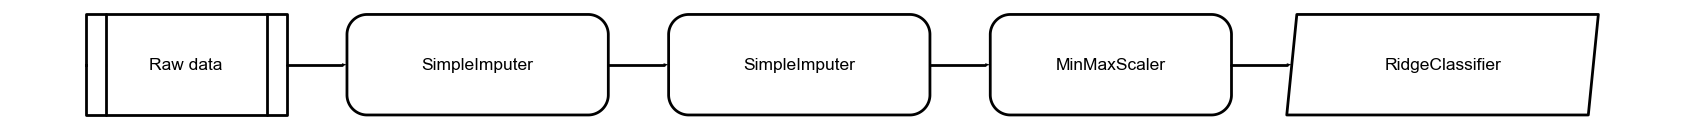

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
# 모형의 평가
evaluate_model(best)

# 주의: minmax변환자료로 부터는 AUC가 구해지지 않음

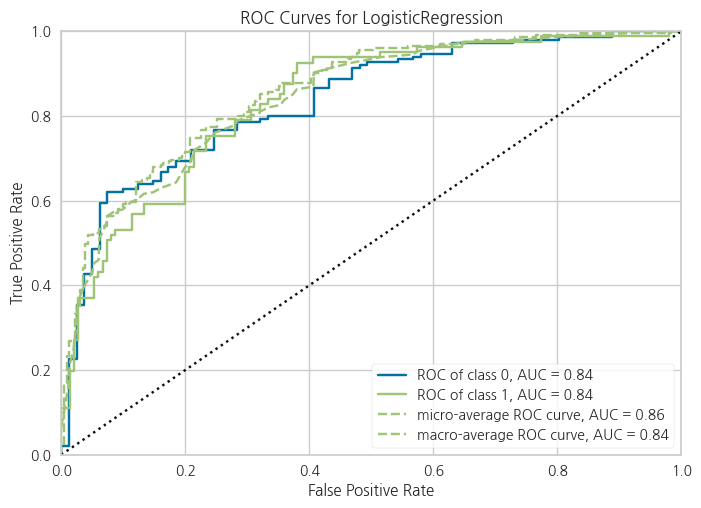

In [42]:
plot_model(best, plot = 'auc')

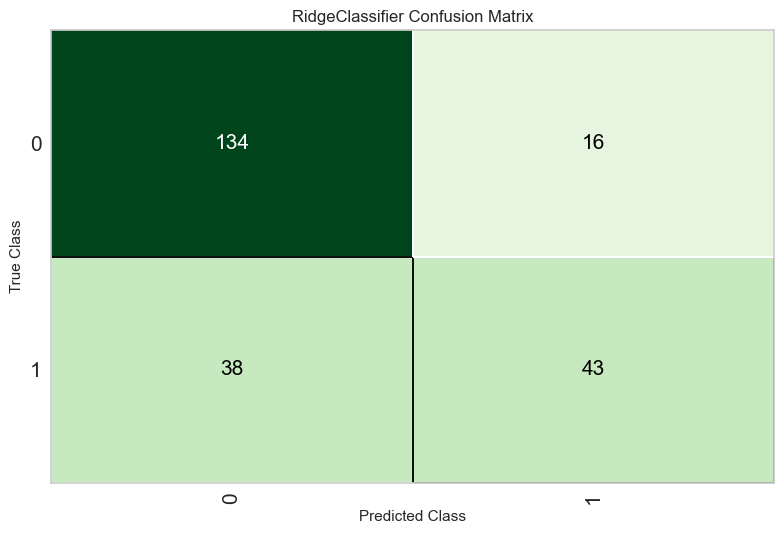

In [19]:
plot_model(best, plot = 'confusion_matrix')

#### 4) 모형 튜닝(Tune Model)

In [20]:
# tune_model활용법
help(tune_model)

Help on function tune_model in module pycaret.classification.functional:

tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'Accuracy', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Optional[str] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, return_train_score: bool = False, **kwargs) -> Any
    This function tunes the hyperparameters of a given estimator. The output of
    this function is a score grid with CV scores by fold of the best selected
    model based on ``optimize`` parameter. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using 

In [21]:
# dt 모형의 생성
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.6895,0.5789,0.6111,0.5946,0.3836,0.3839
1,0.7407,0.7158,0.6316,0.6316,0.6316,0.4316,0.4316
2,0.6852,0.6248,0.4211,0.5714,0.4848,0.2656,0.2720
3,0.6296,0.5820,0.4211,0.4706,0.4444,0.1680,0.1685
4,0.5741,0.5632,0.5263,0.4167,0.4651,0.1191,0.1214
5,0.7407,0.6917,0.5263,0.6667,0.5882,0.4028,0.4088
6,0.6296,0.6060,0.5263,0.4762,0.5000,0.2070,0.2077
7,0.7358,0.6651,0.4444,0.6667,0.5333,0.3592,0.3736
8,0.7358,0.7190,0.6667,0.6000,0.6316,0.4266,0.4280


In [22]:
# 모형의 hyperparameters 튜닝
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.7368,0.5789,0.6875,0.6286,0.4524,0.4561
1,0.7593,0.7481,0.5789,0.6875,0.6286,0.4524,0.4561
2,0.8148,0.7233,0.6316,0.8000,0.7059,0.5735,0.5820
3,0.6852,0.6910,0.5263,0.5556,0.5405,0.3014,0.3016
4,0.6852,0.6474,0.5263,0.5556,0.5405,0.3014,0.3016
5,0.7407,0.8346,0.4737,0.6923,0.5625,0.3874,0.4014
6,0.7407,0.8023,0.6316,0.6316,0.6316,0.4316,0.4316
7,0.7547,0.7746,0.5556,0.6667,0.6061,0.4301,0.4339
8,0.7736,0.7944,0.6667,0.6667,0.6667,0.4952,0.4952


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [23]:
# 설정된 tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# 설정된 grid에 대한 튜닝(MAE 기준 평가)
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6481,0.6180,0.4211,0.5000,0.4571,0.1997,0.2013
1,0.7407,0.8015,0.5263,0.6667,0.5882,0.4028,0.4088
2,0.7407,0.7053,0.5263,0.6667,0.5882,0.4028,0.4088
3,0.7407,0.7075,0.5789,0.6471,0.6111,0.4176,0.4190
4,0.7037,0.6586,0.6842,0.5652,0.6190,0.3802,0.3848
5,0.7407,0.8188,0.3684,0.7778,0.5000,0.3538,0.3989
6,0.8148,0.8594,0.6316,0.8000,0.7059,0.5735,0.5820
7,0.6981,0.7635,0.6667,0.5455,0.6000,0.3614,0.3661
8,0.7170,0.7587,0.5556,0.5882,0.5714,0.3604,0.3607


Fitting 10 folds for each of 7 candidates, totalling 70 fits


####  5) 앙상블 모형(Ensemble Model)

In [24]:
# ensemble_model 활용법
help(ensemble_model)

Help on function ensemble_model in module pycaret.classification.functional:

ensemble_model(estimator, method: str = 'Bagging', fold: Union[int, Any, NoneType] = None, n_estimators: int = 10, round: int = 4, choose_better: bool = False, optimize: str = 'Accuracy', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function ensembles a given estimator. The output of this function is
    a score grid with CV scores by fold. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> dt = create_model('d

In [25]:
# 배깅(Bagging)
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.6820,0.4737,0.6429,0.5455,0.3520,0.3605
1,0.7593,0.7925,0.5789,0.6875,0.6286,0.4524,0.4561
2,0.7593,0.7744,0.5263,0.7143,0.6061,0.4384,0.4490
3,0.6852,0.7233,0.4737,0.5625,0.5143,0.2839,0.2862
4,0.7037,0.7060,0.4737,0.6000,0.5294,0.3175,0.3223
5,0.7963,0.8383,0.5789,0.7857,0.6667,0.5248,0.5375
6,0.7963,0.8075,0.6316,0.7500,0.6857,0.5367,0.5410
7,0.7358,0.8460,0.5556,0.6250,0.5882,0.3948,0.3963
8,0.6981,0.7611,0.5556,0.5556,0.5556,0.3270,0.3270


BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=12345,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=12345, verbose=0,
                  warm_start=False)

In [26]:
# 부스팅(boosting)
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.6226,0.4737,0.5294,0.5000,0.2512,0.2520
1,0.7593,0.7421,0.6842,0.6500,0.6667,0.4785,0.4788
2,0.6667,0.6226,0.4737,0.5294,0.5000,0.2512,0.2520
3,0.6481,0.6203,0.5263,0.5000,0.5128,0.2377,0.2379
4,0.6111,0.5917,0.5263,0.4545,0.4878,0.1771,0.1783
5,0.7778,0.7323,0.5789,0.7333,0.6471,0.4882,0.4954
6,0.6481,0.6203,0.5263,0.5000,0.5128,0.2377,0.2379
7,0.7358,0.7056,0.6111,0.6111,0.6111,0.4111,0.4111
8,0.7736,0.7341,0.6111,0.6875,0.6471,0.4812,0.4830


AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=12345,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=12345)

#### 6) 블랜딩 및 스태킹(Blend and Stacking Models)

In [27]:
# recall기준 상위 3개 모형 선정
best_recall_models_top3 = compare_models(sort = 'recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7503,0.8006,0.5874,0.6629,0.6196,0.4354,0.4395,0.0160
gbc,Gradient Boosting Classifier,0.7429,0.8029,0.5778,0.6497,0.6062,0.4178,0.4232,0.0630
lightgbm,Light Gradient Boosting Machine,0.7281,0.7801,0.5617,0.6215,0.5874,0.3861,0.3892,0.1630
lda,Linear Discriminant Analysis,0.7635,0.8223,0.5611,0.7097,0.6218,0.4536,0.4636,0.0140
ada,Ada Boost Classifier,0.7301,0.7671,0.5564,0.6369,0.5883,0.3901,0.3957,0.0510
rf,Random Forest Classifier,0.7503,0.8128,0.5547,0.6693,0.6021,0.4240,0.4305,0.1010
dt,Decision Tree Classifier,0.6986,0.6646,0.5520,0.5778,0.5592,0.3319,0.3355,0.0130
et,Extra Trees Classifier,0.7541,0.8179,0.5503,0.6815,0.6046,0.4306,0.4380,0.0670
qda,Quadratic Discriminant Analysis,0.7354,0.7980,0.5497,0.6429,0.5884,0.3963,0.4015,0.0130
ridge,Ridge Classifier,0.7654,0.8223,0.5453,0.7209,0.6165,0.4528,0.4647,0.0140


In [28]:
best_recall_models_top3

[GaussianNB(priors=None, var_smoothing=1e-09),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=12345, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        

In [29]:
# 3개 상위모형의 블랜딩(blending top 3 models)
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7368,0.4737,0.5294,0.5000,0.2512,0.2520
1,0.7778,0.8647,0.7368,0.6667,0.7000,0.5242,0.5259
2,0.7222,0.7880,0.4737,0.6429,0.5455,0.3520,0.3605
3,0.7963,0.7564,0.5789,0.7857,0.6667,0.5248,0.5375
4,0.7222,0.7669,0.5263,0.6250,0.5714,0.3682,0.3711
5,0.7963,0.8962,0.6316,0.7500,0.6857,0.5367,0.5410
6,0.7963,0.8617,0.6842,0.7222,0.7027,0.5479,0.5484
7,0.6792,0.7873,0.4444,0.5333,0.4848,0.2548,0.2570
8,0.7358,0.7794,0.6667,0.6000,0.6316,0.4266,0.4280


VotingClassifier(estimators=[('Naive Bayes',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_wei...
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=12345, reg_alpha=0.0,
                                             reg_lambda=0.0, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [91]:
# blend_models 사용법
help(blend_models)

Help on function blend_models in module pycaret.classification.functional:

blend_models(estimator_list: list, fold: Union[int, Any, NoneType] = None, round: int = 4, choose_better: bool = False, optimize: str = 'Accuracy', method: str = 'auto', weights: Optional[List[float]] = None, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function trains a Soft Voting / Majority Rule classifier for select
    models passed in the ``estimator_list`` param. The output of this function
    is a score grid with CV scores by fold. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classificatio

In [30]:
# 스태깅 모형(stacking models)
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7414,0.4737,0.5294,0.5000,0.2512,0.2520
1,0.8148,0.8662,0.6842,0.7647,0.7222,0.5840,0.5860
2,0.7407,0.7744,0.4737,0.6923,0.5625,0.3874,0.4014
3,0.7778,0.7609,0.5263,0.7692,0.6250,0.4749,0.4921
4,0.7407,0.7699,0.5263,0.6667,0.5882,0.4028,0.4088
5,0.7963,0.8857,0.5789,0.7857,0.6667,0.5248,0.5375
6,0.7778,0.8586,0.6316,0.7059,0.6667,0.5008,0.5025
7,0.6981,0.8079,0.4444,0.5714,0.5000,0.2886,0.2933
8,0.7170,0.7778,0.6111,0.5789,0.5946,0.3774,0.3778


StackingClassifier(cv=5,
                   estimators=[('Naive Bayes',
                                GaussianNB(priors=None, var_smoothing=1e-09)),
                               ('Gradient Boosting Classifier',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='log_loss',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,...
                                               subsample_for_bin=200000,
                                               subsample_freq=0))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=12345,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

In [93]:
help(stack_models)

Help on function stack_models in module pycaret.classification.functional:

stack_models(estimator_list: list, meta_model=None, meta_model_fold: Union[int, Any, NoneType] = 5, fold: Union[int, Any, NoneType] = None, round: int = 4, method: str = 'auto', restack: bool = False, choose_better: bool = False, optimize: str = 'Accuracy', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function trains a meta model over select estimators passed in
    the ``estimator_list`` parameter. The output of this function is a
    score grid with CV scores by fold. Metrics evaluated during CV can
    be accessed using the ``get_metrics`` function. Custom metrics
    can be added or removed using ``add_metric`` and ``remove_metric``
    function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')


#### 7) 예측(Prediction)

In [28]:
# 테스트 데이터에 대한 예측
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7662,0.7121,0.5309,0.7288,0.6143,0.4525,0.4642


,preg,plas,pres,skin,test,mass,pedi,age,class,prediction_label
6,3,78,50,32,88,31.000000,0.248,26,1,0
130,4,173,70,14,168,29.700001,0.361,33,1,1
303,5,115,98,0,0,52.900002,0.209,28,1,0
603,7,150,78,29,126,35.200001,0.692,54,1,1
122,2,107,74,30,100,33.599998,0.404,23,0,0
...,...,...,...,...,...,...,...,...,...,...
733,2,106,56,27,165,29.000000,0.426,22,0,0
343,5,122,86,0,0,34.700001,0.290,33,0,0
702,1,168,88,29,0,35.000000,0.905,52,1,1
1,1,85,66,29,0,26.600000,0.351,31,0,0


In [95]:
# 임의의 데이터에 대한 예측
predictions = predict_model(best, data=data)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7695,0.7165,0.5410,0.7286,0.6210,0.4606,0.4711


,preg,plas,pres,skin,test,mass,pedi,age,class,prediction_label
0,6,148,72,35,0,33.599998,0.627,50,1,1
1,1,85,66,29,0,26.600000,0.351,31,0,0
2,8,183,64,0,0,23.299999,0.672,32,1,1
3,1,89,66,23,94,28.100000,0.167,21,0,0
4,0,137,40,35,168,43.099998,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900002,0.171,63,0,0
764,2,122,70,27,0,36.799999,0.340,27,0,0
765,5,121,72,23,112,26.200001,0.245,30,0,0
766,1,126,60,0,0,30.100000,0.349,47,1,0


#### 8) 모형 저장과 로딩(Save and Load Model)

In [96]:
# save model
save_model(best, './Output/Model_pima')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['preg', 'plas', 'pres', 'skin',
                                              'test', 'mass', 'pedi', 'age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=N...
                                                               missing_values=nan,
                                              

In [97]:
# load model
loaded_from_disk = load_model('./Output/Model_pima')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\PARKSE~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['preg', 'plas', 'pres', 'skin',
                                             'test', 'mass', 'pedi', 'age'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('catego...
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('trained_model',
                 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 positive=False, random_state=12345,
                                 solver='auto', tol=0.0001))],
         verbose=False)